

# Entrega 1: Método de Euler modificado.

Dado el problema de valores iniciales

$$
\begin{cases}
y'(t) = f(t, y(t)) \\
y(t_0) = y_0,
\end{cases}
$$

para $t \in [t_0, T_f]$, se desea aproximar la solución numéricamente con el método de Euler modificado, que se define de la siguiente manera: 

Para $ N \in \mathbb{N}$ se definen $ h = \frac{T_f - t_0}{N}$,  $t_n = t_0 + nh$ para $ n = 0, \ldots, N $;

$$
\begin{cases}
y_{0} = y(t_{0}) \\
y_{n+1} = y_n + h f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} f(t_n, y_n)\right), & n = 0, \ldots, N-1.
\end{cases}
$$


$\textbf{Ejercicio 1}$. Escribir la expresión del error de truncado local del método y deducir su orden.

Sabemos, que para los metodos de un paso vale la siguiente igualdad,

$$ y(t + h) = y(t) + h \Phi(t, y(t), h) + h \tau, \quad(1) $$

donde $ \tau $ es el error de truncado local. En el caso particular de euler modificado, tenemos que,

$$ \Phi(t, y(t), h) = f(t + \frac{1}{2}h, y + \frac{1}{2}h f(t, y)) $$

Desarrollando por Taylor, llegamos a que 

$$ f(t + \frac{1}{2}h, y + \frac{1}{2}h f(t, y)) = f(t, y) + f_t(t, y) \frac{1}{2}h + f_x(t, y) \frac{1}{2}h f(t, y) + O(h^2) $$ 

Mientras que, por otro lado, si desarrollamos por Taylor de orden 2 a $y(t + h)$, tenemos

$$ y(t + h) = y(t) + h \cdot f(t, y) + \frac{h^{2}}{2} \cdot (f_t(t, y) h + f_x(t, y) h f(t, y)) + \frac{1}{3!} h^{3} y^{(3)}(\xi), \quad(2) $$ 

$\xi \in [t, t + h]$ 

Luego, igualando (1) y (2), obtenemos que, 

$$ \tau = \frac{h^{2}}{3!} y^{(3)}(\xi), \space \xi \in [t ,t + h]$$

Donde podemos ver que el orden del error es 2.



**Ejercicio 2.**

1. Enunciar y demostrar el teorema que da condiciones suficientes de convergencia para los métodos de un paso.

2. Verificar que, si $f$ es Lipschitz en su segunda variable, el método de Euler modificado satisface las hipótesis de convergencia del teorema.

1. 
Vamos a probar un teorema que da condiciones suficientes de convergencia para metodos de un paso, para eso, antes necesitamos probar el siguiente teorema,

**Teorema del error global:** 

Para $n \in \mathbb{N}$ y $h = \frac{T - t_0}{n}$ consideremos el método de un paso dado por

$$ x_{i+1} = x_i + hψ(t_i, x_i, h), $$

con $ψ$ una función Lipschitz en la segunda variable, o sea, existe una constante $K$ independiente de $t$ y $h$ tal que

$$ |ψ(t,x,h) - ψ(t,y,h)| \leq K|x - y|. $$

para todo $ x, y \in \mathbb{R} $ y $ t \in [t_0, T] $. Entonces, se tiene

$$ |x(t) - x_k(t)| < \frac{\tau_{max}}{K} (e^{K(T-t_0)} - 1), $$

donde $ \tau_{max} = \max_{1 \leq i \leq n} |\tau_i| $, con $ \tau_i $ el error de truncamiento local del método en el paso i.

**Demostracion:**

Sea $e_i = x(t_i) - x_i$, el error global que se comete hasta el paso $i$. Consideramos la ecuación del método,

$$ x_{i+1} = x_i + h\phi(t_i, x_i, h) $$
$$ x(t_{i+1}) = x(t_{i}) + h\phi(t_i, x(t_i), h) + h \tau_i$$

luego,

$$ e_{i+1} = x(t_{i+1}) - x_{i+1} = e_i - h (\phi(t_i, x(t_i), h) - \phi(t_i, x_i, h)) + h\tau_i $$

Usando que $\phi$ es Lipschitz se obtiene

$$ |e_{i+1}| \leq |e_i| + hK|x(t_i) - x_i| + h|\tau_i| \leq (1 + hK) |e_i| + h |\tau_i|$$

Como $|\tau_i| \leq \tau_{max}$, llamando $A = 1 + Kh$, tenemos

$$ |e_{i+1}| \leq A|e_i| + h\tau_{max} $$

Usando esta acotación para $i = 0$ y teniendo en cuenta que $e_0 = 0$ se tiene

$
\begin{align}
|e_1| &\leq hT_{\text{max}}; \\
|e_2| &\leq A|e_1| + hT_{\text{max}} \leq AhT_{\text{max}} + hT_{\text{max}} = (1+ A)hT_{\text{max}}; \\
|e_3| &\leq A|e_2| + hT_{\text{max}} \leq A(1 + A)hT_{\text{max}} + hT_{\text{max}} \\
&= (A + A^2)hT_{\text{max}} + hT_{\text{max}} \\
&= (1+ A + A^2)hT_{\text{max}}.
\end{align}
$

Iterando el procedimiento, podemos ver que

$$ |e_n| \leq (1 + A + A^2 + \ldots + A^{n-1})hT_{\text{max}} = hT_{\text{max}} \sum_{j=0}^{n-1} A^j. $$

Ahora, usando la fórmula para suma de potencias tenemos

$$ |e_n| \leq \frac{hT_{\text{max}} (A^n - 1)}{A - 1}, $$

es decir,

$$ |e_n| < hT_{\text{max}} \left( \frac{(1 + Kh)^n - 1}{Kh} \right) = \frac{T_{\text{max}}}{K} \left({(1 + Kh)^n - 1} \right). $$

Como para $ \alpha > 0 $ se tiene

$$ (1 + \alpha)^k \leq e^{k\alpha} $$
entonces,
$$ |e_n| \leq \frac{T_{\text{max}}}{K}(e^{nKh} - 1) = \frac{T_{\text{max}}}{K}(e^{K (T - t_0 )} - 1) , $$

lo que concluye la demostración.



Ahora si, ya estamos en condiciones de probar el siguiente teorema,

**Teorema** : Si un método de un paso es consistente y $\Phi$ es Lipschitz en la segunda variable entonces el método es convergente.

Demostración:

Queremos ver que un metodo es convergente, es decir, 

$$ \lim_{N \to \infty} |E_N| = |y(t_N) - y_N| = 0 $$

Como $\Phi$ es L-Lipschitz en su segunda variable, por el teorema anterior tenemos la siguiente cota para el error global,

$$ |E_n| \leq \frac{e^{L(t_f - t_0) - 1}}{L}\tau_{max} \quad(1) $$

Por otro lado, si el metodo es consistente, sabemos que

$$ \lim_{h \to 0}\tau_{max} = 0 \quad(2) $$

Recordemos que si $ h \to 0 $, como $ h = \frac{t_f - t_0}{N} $, tenemos que $N \to \infty$, por (1), (2) y el Teorema del Sandwich,

$$ \lim_{N \to \infty}|y(t_N) - y_N| = 0 $$

Luego, el método es convergente.

2.

Para ver que el método es convergente, debemos ver que sea consistente y, que $\Phi$ sea Lipschitz en su segunda variable. Vimos en clase que 
basta ver que $\Phi(t, y, 0) = f(t, y)$ para afirmar que el metodo es consistente. Hagamos la cuenta,

$$\Phi(t, y, 0) =  f(t + \frac{1}{2} \cdot 0, y + \frac{1}{2} \cdot 0 f(t, y)) = f(t, y).$$

Luego, el metodo de Euler modificado es consistente, falta ver que es Lipschitz en su segunda variable.

$$

\begin{align*}
|\Phi(t, y_{1}, h) - \Phi(t, y_{2},  h)| &= |f(t + \frac{1}{2} \cdot h, y_{1} + \frac{1}{2} \cdot h f(t, y_{1})) - f(t + \frac{1}{2} \cdot h, y_{2} + \frac{1}{2} \cdot h f(t, y_{2}))| \\

&\leq L \cdot |y_{1} + \frac{1}{2} \cdot h f(t, y_{1}) - y_{2} + \frac{1}{2} \cdot h f(t, y_{2})| \\

&= L \cdot |y_{1} - y_{2} + \frac{1}{2} \cdot h (f(t, y_{1}) - f(t, y_{2}))| \\

&\leq L \cdot |y_{1} - y_{2}| + L|\frac{1}{2} \cdot h (f(t, y_{1}) - f(t, y_{2}))| \\

&\leq L \cdot |y_{1} - y_{2}| + L^{2} \frac{1}{2} \cdot h |(y_{1} - y_{2})| \\

&= (L + L^{2} \frac{1}{2} \cdot h) \cdot |y_{1} - y_{2}|

\end{align*}

$$

Por lo tanto, $\Phi$ es Lipschitz en su segunda variable, y por ende convergente.

$ \textbf{Ejercicio 3}. $ Escribir un programa que implemente el método de Euler modificado para resolver ecuaciones de la forma

$$
\begin{cases}
y'(t) = f(t, y(t)) \\
y(t_0) = y_0,
\end{cases}
$$

tomando como parámetros la función $ f $, los tiempos inicial y final $ t_0 $ y $ t_f $, la cantidad de pasos $ N $ y el dato inicial $ y_0 $; y arrojando como resultados el vector de tiempos $ t = (t_0, t_1, \ldots, t_n) $ y el vector solución $ y = (y_0, y_1, \ldots, y_n) $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos el metodo de Euler modificado.

def euler_modificado(f, t0, tf, N, y0):

    # Definimos el paso
    h = (tf - t0) / N 
    
    # Inicializamos los valores de t
    t = np.linspace(t0, tf, N + 1)

    # Array donde vamos a guardar los y
    y = np.zeros(N+1)

    # Valor inicial
    y[0] = y0

    for i in range(N):
        y[i + 1] = y[i] + h * ( f(t[i] + h/2, y[i] + (h/2) * f(t[i], y[i])) )

    return t, y

In [4]:
def euler_explicito(f, t0, tf, N, y0):

    # Definimos el paso
    h = (tf - t0) / N 
    
    # Inicializamos los valores de t
    t = np.linspace(t0, tf, N + 1)

    # Array donde vamos a guardar los y
    y = np.zeros(N+1)

    # Valor inicial
    y[0] = y0

    for i in range(N):
        y[i + 1] = y[i] + h * f(t[i], y[i])

    return t, y

$ \textbf{Ejercicio 4}. $ Resolver numéricamente el problema

$$
\begin{cases}
y'(t) = y(t), \\
y(0) = 1,
\end{cases}
$$

en el intervalo $[0,1]$ utilizando los métodos de Euler explícito y de Euler modificado, tomando $N = 2^k$ para $k = 2, \ldots, 8$. Para cada $N$ calcular el error que se comete al aproximar $y(1): E_N = |y(1) - y_N|$. Graficar $\log(E_N)$ en función de $\log(N)$. ¿Qué se espera ver? ¿El resultado es consistente con lo esperado?

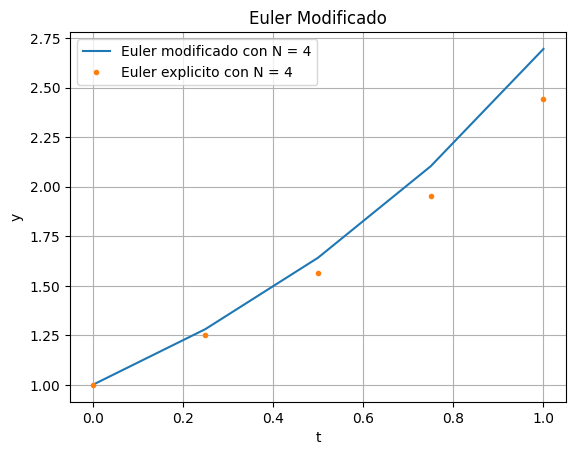

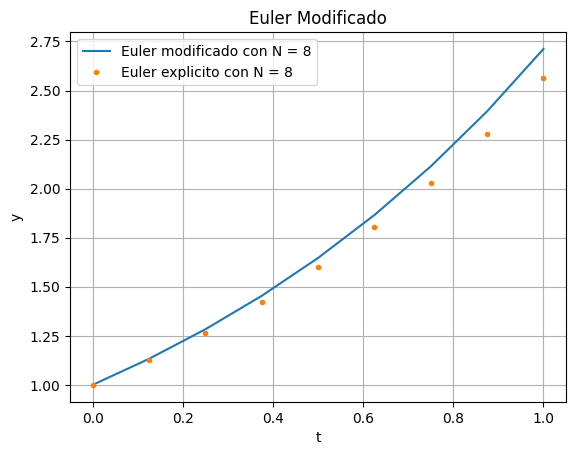

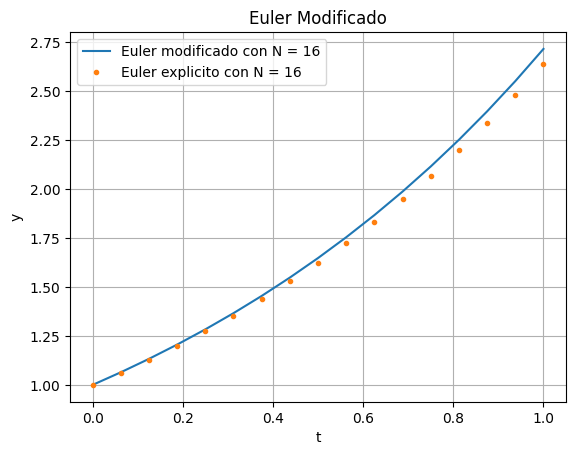

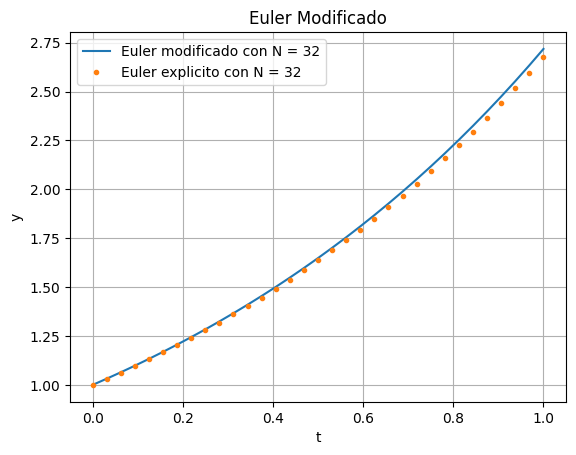

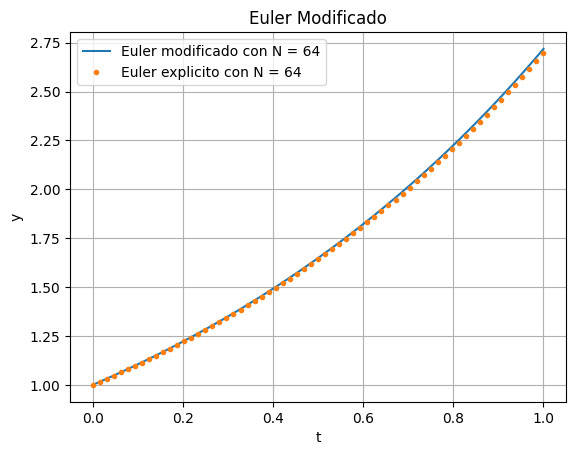

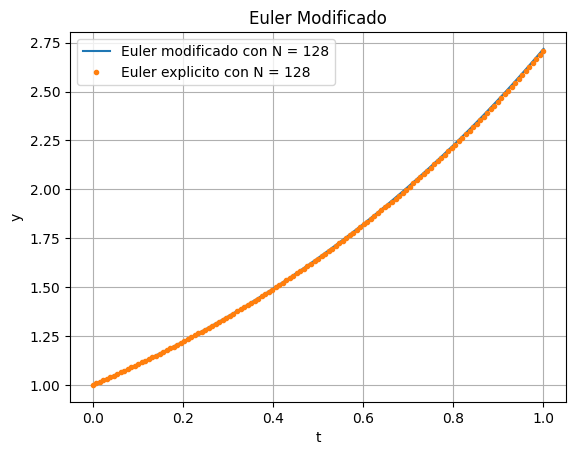

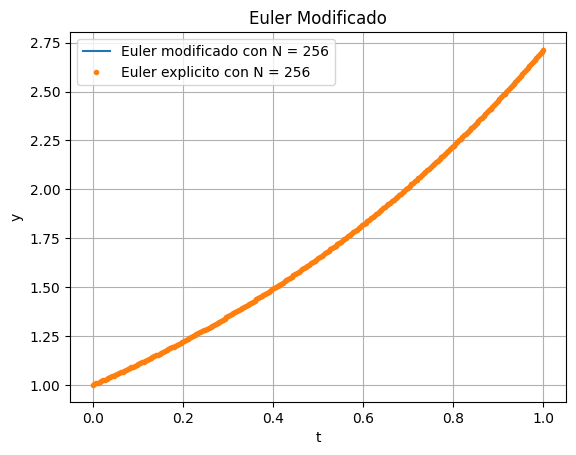

In [8]:
# Definimos f
def f(t, y):
    return y

# Defino los valores de k.
k_values = [2, 3, 4, 5, 6, 7, 8]

# Parametros inciales
t0 = 0
tf = 1
y0 = 1

# Array de error
error_mod = np.zeros(7)
error_explicito = np.zeros(7)

# Llamamos al metodos de Euler
for i in range(len(k_values)):
    N = 2**k_values[i]

    # Aproximamos con Euler modificado.
    t, y = euler_modificado(f, t0, tf, N, y0)

    # Guardo el error. Uso que la solucion es y(t) = e^t
    error_mod[i] = abs(np.e - y[N])

    # Ploteamos euler modificado.
    plt.plot(t, y,'-', label = "Euler modificado con N = {}".format(N))

    # Aproximamos con Euler explicito
    tt, yy = euler_explicito(f, t0, tf, N, y0)

    # Guardamos el error.
    error_explicito[i] = abs(np.e - yy[N])

    # Ploteamos euler explicito
    plt.plot(tt, yy,'.', label = "Euler explicito con N = {}".format(N))

    # Graficamos los resultados.
    plt.figsize = (10, 6)

    plt.grid()
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Euler Modificado')

    # Muestra el grafico
    plt.show()

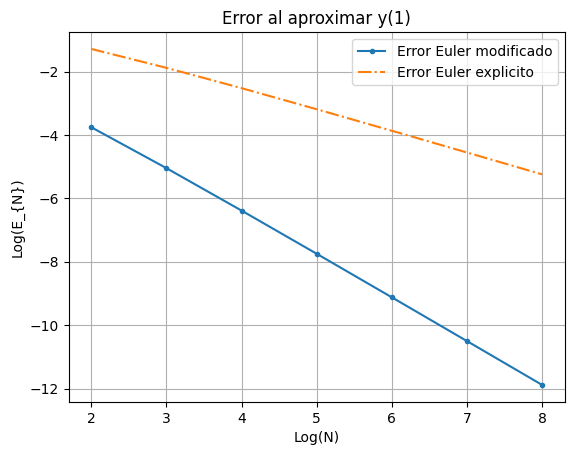

In [9]:
# Guardo los valores de log (E_{N})
error_mod = np.log(error_mod)
error_explicito = np.log(error_explicito)

# Ploteo Log(E_{N}) contra Log(N)
plt.plot(k_values, error_mod, '-.', label = "Error Euler modificado")
plt.plot(k_values, error_explicito, '-.', label = "Error Euler explicito")

plt.figsize = (10, 6)

plt.legend()
plt.grid()
plt.xlabel('Log(N)')
plt.ylabel('Log(E_{N})')
plt.title('Error al aproximar y(1)')


plt.show()

**Conclusiones ejercicio 4.**

El resultado se condice con el esperado, a mayor cantidad de pasos el error al aproximar y(1) es menor. Sin embargo, se puede ver que con un N no tan grande podemos obtener muy buenas aproximaciones. Por otro lado, el metodo de euler modificado aproxima mucho mejor que el metodo explicito a misma cantidad de pasos, mas aún con N = 8 obtiene casi los mismos resultados que euler explicito con N = 256. 
 